In [786]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from dataclasses import dataclass

In [787]:
seed = 42

In [788]:
df = pd.read_csv('data.csv')
df.drop(columns=['ID'], inplace=True)
df.reset_index(drop=True)
df.sample(5)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
1836,53.0,female,37.430,1,-,northwest,Single,Unemployed,Sedentary,5.4,Good,63725.44,10959.69470
707,23.0,female,42.750,1,yes,northeast,Married,Management,Lightly Active,7.8,Poor,312600.88,40904.19950
491,26.0,male,31.065,0,no,northwest,Engaged,Healthcare Support,Moderately Active,5.9,Good,15555.26,2699.56835
2408,61.0,male,28.310,1,yes,northwest,Engaged,Education,Sedentary,7.9,Fair,125963.32,28868.66390
2317,42.0,female,24.985,2,-,northwest,Single,Education,Sedentary,9.7,Fair,36999.25,8017.06115


In [789]:
df.describe()

,age,bmi,children,stress_level,income (USD),charges (USD)
count,3098.000000,3067.000000,3098.000000,3098.000000,3098.000000,3075.000000
mean,39.093165,32.163444,1.118786,6.414526,62360.722112,13476.771230
std,14.133351,99.325991,1.207859,1.721550,64646.475643,12080.919557
min,-8.000000,-989.915959,-3.000000,0.000000,-126055.018185,1000.000000
25%,27.000000,26.315000,0.000000,5.200000,20236.880000,4718.863800
50%,39.000000,30.495000,1.000000,6.400000,41783.988014,9644.252500
75%,51.000000,34.800000,2.000000,7.600000,83888.017500,17807.613070
max,88.336729,5424.864393,5.000000,10.000000,528054.020000,63770.428010


In [790]:
print(f'smoker: {df.smoker.unique()}')
print(f'gender: {df.gender.unique()}')
print(f'region: {df.region.unique()}')
print(f'status: {df.status.unique()}')
print(f'work sector: {df.work_sector.unique()}')
print(f'sleep quality: {df.sleep_quality.unique()}')
print(f'physical activity: {df.physical_activity.unique()}')

smoker: ['no' 'yes' '-' 'DFH']
gender: ['female' 'male']
region: ['southwest' 'northwest' 'southeast' 'northeast']
status: ['Single' 'Engaged' 'Married' 'Single-Parent' 'CDE' 'ABC' nan]
work sector: ['Education' 'IT Support' 'Transportation' 'Hospitality' 'Unemployed'
 'Healthcare Support' 'Retail' 'Entrepreneur' 'Finance' 'Construction'
 'Retail Management' 'Healthcare' 'Law' 'Management' 'Self-Employed' 'IT'
 nan 'Engineering' 'Wizardry' 'Interdimensional Trade']
sleep quality: ['Fair' 'Poor' 'Good' 'Excellent' 'CDE']
physical activity: ['Lightly Active' 'Sedentary' 'Very Active' 'Moderately Active' nan
 'video-gamer']


In [791]:
mask = (df['status'] == 'ABC') | (df['status'] == 'CDE') | (df['sleep_quality'] == 'CDE') | (
        df['physical_activity'] == 'video-gamer')
df[mask]
# drop those 3 as they make no sense and ~0.1% of dataset
# all of them have 2 'corrupted' features

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
36,32.027049,male,32.316381,-3,no,southeast,Married,Construction,Moderately Active,5.3,CDE,9390.753386,10412.900531
573,22.632769,male,-989.915959,0,no,northwest,CDE,Healthcare Support,Lightly Active,2.0,Excellent,98023.266602,22486.448061
639,44.676202,male,27.186491,0,yes,southeast,ABC,Wizardry,video-gamer,4.9,Good,85887.492717,14737.870783


also 'Wizardry' and 'Interdimensional Trade' are strange, I'll drop them to nan and use as Unknown

In [792]:
df.work_sector = df.work_sector.replace(['Wizardry', 'Interdimensional Trade'], np.nan)

In [793]:
df = df[~mask]
df.reset_index(drop=True)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
0,45.0,female,25.700,3,no,southwest,Single,Education,Lightly Active,6.9,Fair,44324.35,9101.79800
1,32.0,male,28.120,4,yes,northwest,Engaged,IT Support,Sedentary,6.9,Poor,102553.91,21472.47880
2,41.0,female,37.100,2,-,southwest,Single,Transportation,Very Active,5.9,Fair,18429.43,7371.77200
3,26.0,male,31.065,0,no,northwest,Single,Education,Sedentary,5.9,Fair,14888.09,2699.56835
4,23.0,female,34.960,3,no,northwest,Married,Hospitality,Sedentary,8.6,Good,15571.19,4466.62140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,54.0,male,34.210,2,yes,southeast,Married,Finance,Lightly Active,9.2,Poor,336130.93,44260.74990
3091,18.0,female,31.350,4,no,northeast,Single,Retail,Sedentary,10.0,Poor,21624.45,4561.18850
3092,39.0,female,23.870,5,no,southeast,Single,Transportation,Lightly Active,5.8,Good,36357.70,8582.30230
3093,58.0,male,25.175,0,no,northeast,Single,Education,Lightly Active,4.7,Poor,69475.40,11931.12525


let's encode features:
- gender to boolean 'is_male'
- smoker oneHot (smoking, not smoking, unknown)
- region oneHot
- status oneHot (later after imputation)
- work_sector oneHot (later after imputation)
- sleep_quality numerical (as it's ordinal Poor -> Excellent)
- physical_activity numerical (as it's ordinal Sedentary -> Very Active)

In [794]:
print(f'{(df.children < 0).sum()} negative children rows')
df[(df.age < 18)]

1 negative children rows


,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
87,15.123557,female,30.360872,0,no,southeast,Single,Retail,Lightly Active,6.3,Poor,87861.868595,12864.070934
229,15.727649,female,41.854735,3,no,southeast,Married,IT,Moderately Active,4.5,Poor,140960.706083,46680.037223
306,15.168302,female,33.939556,0,yes,southwest,Engaged,Retail Management,Moderately Active,6.7,Fair,111189.507135,2495.923471
450,6.190668,female,22.324037,1,no,southeast,Married,Hospitality,Sedentary,1.8,Excellent,865.951745,5679.525258
454,13.329776,male,31.931234,3,yes,northwest,Single,Healthcare,Sedentary,7.3,Poor,86474.198292,29890.117369
482,2.374126,female,26.686038,1,no,northwest,Single,Finance,Moderately Active,6.5,Fair,101398.371162,27999.218508
695,2.879041,female,28.338212,2,yes,southwest,Single,Finance,Lightly Active,9.1,Poor,148958.692649,37556.610697
789,15.834161,male,38.075766,1,no,northwest,Single,Healthcare,Lightly Active,8.1,Poor,7890.258501,17332.663693
871,12.526339,female,26.256683,2,no,northwest,Married,Management,Moderately Active,4.3,Fair,143381.792011,3256.099146
882,10.592705,male,31.844211,0,yes,northeast,Married,Hospitality,Lightly Active,6.2,Poor,20342.800913,23619.942885


only one with negative children, let's just set it to 0

those values of age make no sense (married or with children at <18...)

let's drop those with nan, and later impute them

In [795]:
df['smoker'] = df['smoker'].str.strip().str.lower()
df['smoking'] = df['smoker'].eq('yes').astype('float')
df['not_smoking'] = df['smoker'].eq('no').astype('float')
df = df.drop(columns=['smoker'])
df.children = df.children.apply(lambda x: max(x, 0)).astype(float)
df['is_male'] = df.gender.apply(lambda x: 1 if x == 'male' else 0).astype(float)
df.drop(columns=['gender'], inplace=True)
df = pd.get_dummies(df, columns=['region'], drop_first=True, dtype=float)
df.sleep_quality = df.sleep_quality.apply(lambda x:
                                          {
                                              'Poor': 0,
                                              'Fair': 1,
                                              'Good': 2,
                                              'Excellent': 3
                                          }[x]).astype(float)
df.physical_activity = df.physical_activity.apply(lambda x:
                                                  {
                                                      'Sedentary': 0,
                                                      'Lightly Active': 1,
                                                      'Moderately Active': 2,
                                                      'Very Active': 3
                                                  }.get(x, np.nan)).astype(float)
df.age = df.age.where(df.age >= 18)
df.sample(10)

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest
2153,38.000000,34.800000,2.0,Single,Hospitality,1.0,4.4,1.0,28065.420000,6571.544000,0.0,1.0,0.0,0.0,0.0,1.0
398,58.002773,16.415720,1.0,Married,Finance,2.0,4.2,0.0,133173.271141,26084.145627,1.0,0.0,1.0,1.0,0.0,0.0
647,34.880154,25.768449,0.0,Single,Retail,2.0,4.4,2.0,-1886.734331,1000.000000,0.0,1.0,0.0,0.0,0.0,0.0
2047,46.000000,39.425000,1.0,Single,Transportation,2.0,3.0,1.0,30438.820000,8342.908750,0.0,1.0,1.0,0.0,0.0,0.0
1724,57.000000,22.230000,0.0,Married,Education,1.0,3.1,2.0,42729.380000,12029.286700,0.0,1.0,0.0,0.0,0.0,0.0
1303,47.000000,36.080000,1.0,Single-Parent,IT,1.0,8.1,0.0,206744.660000,42211.138200,1.0,0.0,1.0,0.0,1.0,0.0
1409,48.000000,41.230000,4.0,Married,Education,1.0,6.5,1.0,57691.210000,11033.661700,0.0,1.0,0.0,1.0,0.0,0.0
2712,18.000000,38.170000,0.0,Single,Retail,1.0,4.2,1.0,7387.500000,1631.668300,0.0,1.0,0.0,0.0,1.0,0.0
37,33.000000,35.750000,2.0,Single,Retail,2.0,6.3,1.0,21300.400000,4889.999500,0.0,1.0,1.0,0.0,1.0,0.0
2757,50.500061,34.050871,3.0,Engaged,Unemployed,1.0,3.0,3.0,150829.148921,10355.594074,0.0,1.0,1.0,0.0,1.0,0.0


In [796]:
row_misses = df.isna().mean(axis=1) * 100
(row_misses > 30).sum()  # all rows good

0

now let's check outliers

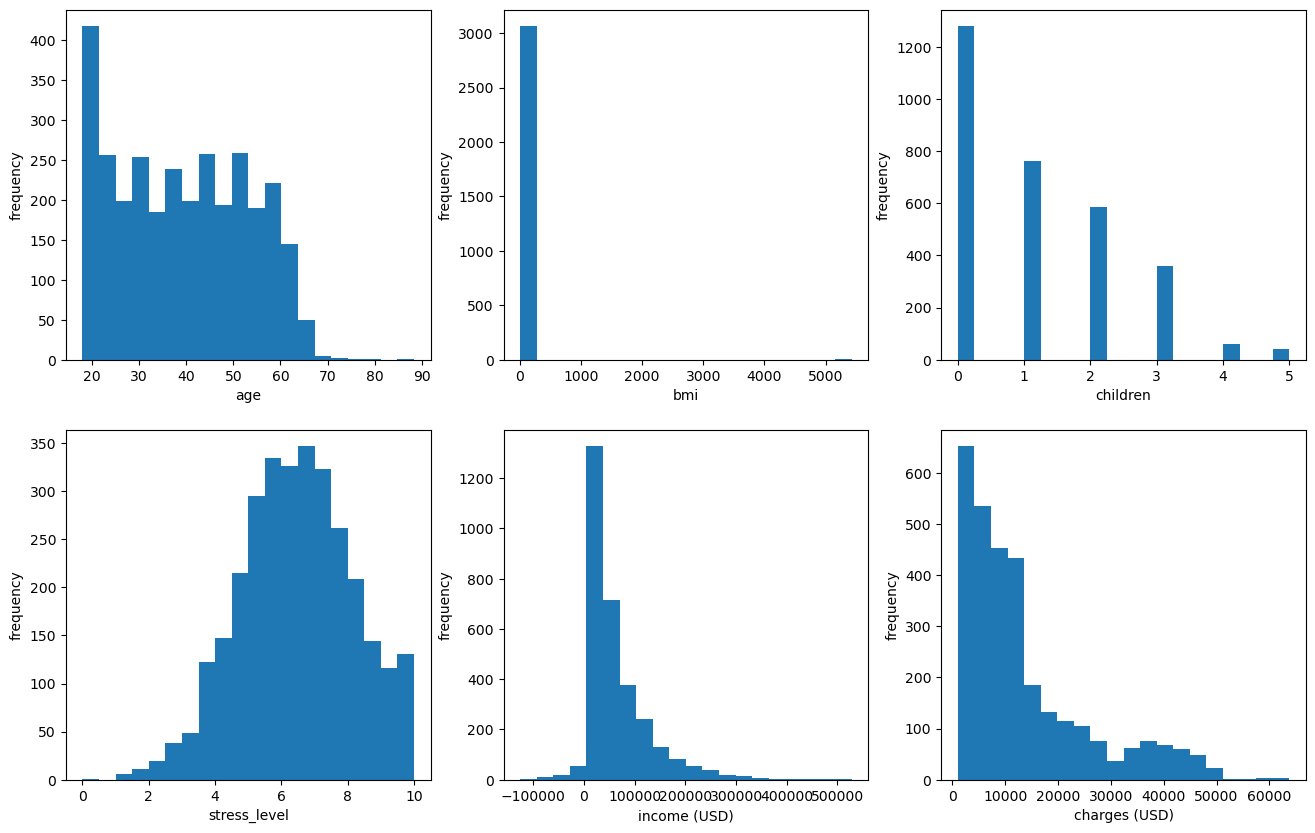

In [797]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

- bmi clearly have outliers
- income is super skewed, let's drop negative vals (for later imputation) and do log transform
- charges skewed too, same log there
- age is uniform, so let's bin it
- also we have negative income... I'll make a flag for those values (negative_income_flag), this flag would allow us to treat those values better OR it'll be reduced on feature selection phase

In [798]:
(df['income (USD)'] <= 0).sum()

54

In [799]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df.bmi = df.bmi.mask((df.bmi < lower) | (df.bmi > upper))

mask = (df['income (USD)'] < 0)
df['negative_income_flag'] = mask.astype(float)

df['income (USD)'] = np.log1p(df['income (USD)'].apply(lambda x: max(x, 0)))
df['charges (USD)'] = np.log1p(df['charges (USD)'].apply(lambda x: max(x, 0)))

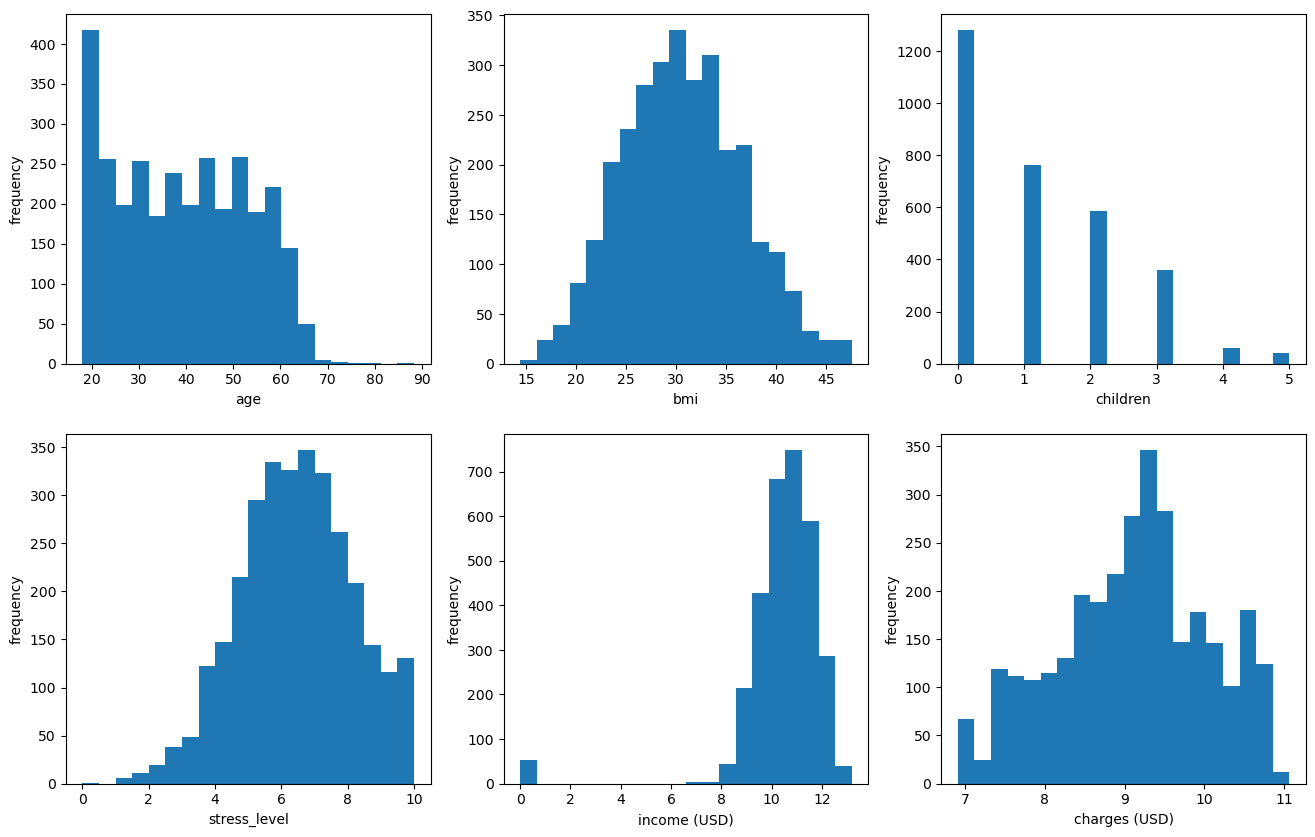

In [800]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

binning:

let's bin to <25, 25-35, 35-45 ... >65

In [801]:
cut = [15, 25, 35, 45, 55, 65, 100]
labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65+']
df.age = pd.cut(df.age, bins=cut, labels=labels)
df

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest,negative_income_flag
0,35-45,25.700,3.0,Single,Education,1.0,6.9,1.0,10.699312,9.116337,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,25-35,28.120,4.0,Engaged,IT Support,0.0,6.9,0.0,11.538154,9.974574,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,35-45,37.100,2.0,Single,Transportation,3.0,5.9,1.0,9.821758,8.905549,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25-35,31.065,0.0,Single,Education,0.0,5.9,1.0,9.608384,7.901218,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,15-25,34.960,3.0,Married,Hospitality,0.0,8.6,2.0,9.653242,8.404611,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,45-55,34.210,2.0,Married,Finance,1.0,9.2,0.0,12.725259,10.697876,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3094,15-25,31.350,4.0,Single,Retail,0.0,10.0,0.0,9.981626,8.425558,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3095,35-45,23.870,5.0,Single,Transportation,1.0,5.8,2.0,10.501189,9.057574,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3096,55-65,25.175,0.0,Single,Education,1.0,4.7,0.0,11.148742,9.386990,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Imputation time

In [802]:
df.isna().sum()

age                     23
bmi                     48
children                 0
status                   1
work_sector             39
physical_activity       79
stress_level             0
sleep_quality            0
income (USD)             0
charges (USD)           23
smoking                  0
not_smoking              0
is_male                  0
region_northwest         0
region_southeast         0
region_southwest         0
negative_income_flag     0
dtype: int64

let's drop all rows for charges (as it's target feature)

In [803]:
df = df[~df['charges (USD)'].isna()]

work sector: is something not imputable (as it's a job I will make Missing values 'Unknown')

In [804]:
df.loc[:, 'work_sector'] = df['work_sector'].fillna('Unknown')

age: we are missing only 23 vals, so let's fill with mode

In [805]:
df.loc[:, 'age'] = df['age'].fillna(df['age'].mode()[0])

physical activity: we are missing only 79 vals, fill with mode

In [806]:
df.loc[:, 'physical_activity'] = df['physical_activity'].fillna(df['physical_activity'].mode()[0])

status: same

In [807]:
df.loc[:, 'status'] = df['status'].fillna(df['status'].mode()[0])

now we can do imputation:
- split
- scale
- kNN impute

In [808]:
y = df.pop('charges (USD)')
X = df

In [809]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=seed, shuffle=True
)

Now we gonna scale + impute

In [810]:
cols = ['bmi', 'stress_level', 'income (USD)']
robust_scaler = sk.preprocessing.RobustScaler()
X_train[cols] = robust_scaler.fit_transform(X_train[cols])
X_test[cols] = robust_scaler.transform(X_test[cols])

for kNN imputation I'll use Jensen–Shannon divergence formula, to keep distribution alike

In [811]:
def jsd(x, y, bins=30, eps=1e-12):
    hx, e = np.histogram(np.asarray(x, float)[~np.isnan(x)], bins=bins, density=True)
    hy, _ = np.histogram(np.asarray(y, float)[~np.isnan(y)], bins=e, density=True)
    hx = (hx + eps)
    hy = (hy + eps)
    hx /= hx.sum()
    hy /= hy.sum()
    m = 0.5 * (hx + hy)
    js = 0.5 * np.sum(hx * (np.log(hx) - np.log(m))) + 0.5 * np.sum(hy * (np.log(hy) - np.log(m)))
    return float(js / (np.log2(len(hx)) if len(hx) > 1 else 1.0))

In [812]:
def try_knn(n):
    X_train_copy = X_train.copy()
    kNN_imputer = sk.impute.KNNImputer(n_neighbors=n)
    X_train_copy[cols] = kNN_imputer.fit_transform(X_train_copy[cols])
    avg_loss = 0
    for col in cols:
        avg_loss += jsd(X_train[col], X_train_copy[col])
    avg_loss /= len(cols)
    return avg_loss

In [813]:
best_n = -1
best_loss = float('inf')
for n in range(1, 101):
    avg_loss = try_knn(n)
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_n = n
print(f'Best N: {best_n} with loss: {best_loss}')

Best N: 4 with loss: 8.67407332834396e-07


In [814]:
kNN_imputer = sk.impute.KNNImputer(n_neighbors=best_n)
X_train[cols] = kNN_imputer.fit_transform(X_train[cols])
X_test[cols] = kNN_imputer.transform(X_test[cols])

In [815]:
cat_cols = ['status', 'work_sector', 'age']

encoder = sk.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False)

Xtr_cat = encoder.fit_transform(X_train[cat_cols])
Xte_cat = encoder.transform(X_test[cat_cols])

cat_names = encoder.get_feature_names_out(cat_cols)
Xtr_cat = pd.DataFrame(Xtr_cat, index=X_train.index, columns=cat_names)
Xte_cat = pd.DataFrame(Xte_cat, index=X_test.index, columns=cat_names)

num_cols = [c for c in X_train.columns if c not in cat_cols]
X_train = pd.concat([X_train[num_cols].reset_index(drop=True), Xtr_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test[num_cols].reset_index(drop=True), Xte_cat.reset_index(drop=True)], axis=1)

In [816]:
X_train.isna().sum()

bmi                               0
children                          0
physical_activity                 0
stress_level                      0
sleep_quality                     0
income (USD)                      0
smoking                           0
not_smoking                       0
is_male                           0
region_northwest                  0
region_southeast                  0
region_southwest                  0
negative_income_flag              0
status_Engaged                    0
status_Married                    0
status_Single                     0
status_Single-Parent              0
work_sector_Construction          0
work_sector_Education             0
work_sector_Engineering           0
work_sector_Entrepreneur          0
work_sector_Finance               0
work_sector_Healthcare            0
work_sector_Healthcare Support    0
work_sector_Hospitality           0
work_sector_IT                    0
work_sector_IT Support            0
work_sector_Law             

### Feature selection

I'll do 3 shown methods, retrieve their masks and sum them to get finale feature subset

In [817]:
select1 = sk.feature_selection.SelectKBest(k=30)
select1.fit(X_train, y_train)
mask1 = select1.get_support()
mask1

C:\Users\retrj\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True])

In [818]:
select2 = sk.feature_selection.SelectFromModel(sk.ensemble.RandomForestRegressor(n_estimators=100, random_state=seed),
                                               threshold="median")
select2.fit(X_train, y_train)
mask2 = select2.get_support()
mask2

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False])

In [819]:
select3 = sk.feature_selection.RFE(sk.ensemble.RandomForestRegressor(n_estimators=100, random_state=seed),
                                   n_features_to_select=30)
select3.fit(X_train, y_train)
mask3 = select3.get_support()
mask3

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True, False])

In [820]:
final_mask = mask1.astype(int) + mask2.astype(int) + mask3.astype(int)

now let's drop those with score less then 2

In [821]:
final_mask = final_mask > 1
final_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True, False])

so we are going to drop those columns:

In [822]:
X_train.columns[~final_mask]

Index(['status_Engaged', 'work_sector_Education', 'work_sector_Engineering',
       'work_sector_Entrepreneur', 'work_sector_Healthcare Support',
       'work_sector_IT Support', 'work_sector_Law',
       'work_sector_Retail Management', 'work_sector_Transportation',
       'work_sector_Unemployed', 'work_sector_Unknown', 'age_65+'],
      dtype='object')

In [823]:
X_train_reduced = X_train.loc[:, final_mask]
X_test_reduced = X_test.loc[:, final_mask]

In [824]:
print(f'{X_train.shape[1]} features reduced to {X_test_reduced.shape[1]} features')

41 features reduced to 29 features


# Linear Regression

3.a) Let's test sklearn implementation of Linear regression

In [825]:
model = sk.linear_model.LinearRegression()
model.fit(X_train_reduced, y_train)

y_pred_train = model.predict(X_train_reduced)
y_pred_test = model.predict(X_test_reduced)

print("intercept_:", model.intercept_)
print("coef_:", model.coef_)
print("RMSE (train):", sk.metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE (test):", sk.metrics.mean_squared_error(y_test, y_pred_test))

intercept_: 9.349172547435582
coef_: [-0.00553033  0.02962607 -0.02196714  0.03243657 -0.00885869  0.64924113
  0.38587097  0.04691449 -0.03760683  0.03997377 -0.02823055  0.01539006
  4.67712756  0.2831834  -0.01270652  0.35930376 -0.13453449  0.35297851
  0.30267625 -0.09193807  0.48472186  0.32566045 -0.07846977  0.06198196
 -0.79108262 -0.61232971 -0.4178773  -0.26398166 -0.16856655]
RMSE (train): 0.2066383549504387
RMSE (test): 0.20663690058173056


Now, let's do linear regression by our own

In [826]:
@dataclass
class EpochLog:
    epoch: int
    train_losses: tuple[float, float, float, float]  # MSE, RMSE, MAE, R2
    test_losses: tuple[float, float, float, float]  # MSE, RMSE, MAE, R2
    theta: list[float]


def linear_regression(eta, n_epochs, batch_size=None):
    batch_size = batch_size or X_train_reduced.shape[0]
    logs: list[EpochLog] = []

    rng = np.random.default_rng(seed)

    theta = np.random.randn(X_train_reduced.shape[1] + 1, 1).reshape(1, -1)[0]

    Xt = np.c_[np.ones((len(X_test_reduced), 1)), X_test_reduced]

    for epoch in range(1, n_epochs + 1):
        idx = rng.permutation(X_train_reduced.shape[0])

        X_train_reduced_shuffed = X_train_reduced.iloc[idx]
        ytr = y_train.iloc[idx]

        Xtr = np.c_[np.ones((len(X_train_reduced_shuffed), 1)), X_train_reduced_shuffed]

        for step in range((X_train_reduced.shape[0] + batch_size - 1) // batch_size):
            start = step * batch_size
            end = min(start + batch_size, X_train_reduced.shape[0])

            Xb = Xtr[start:end]
            yb = ytr[start:end]

            grad = (2.0 / Xb.shape[0]) * (Xb.T @ (Xb @ theta - yb))

            theta -= eta * grad

        ytr_pred = Xtr @ theta
        yt_pred = Xt @ theta

        tr_losses = (
            sk.metrics.mean_squared_error(ytr, ytr_pred, ),  # MSE
            sk.metrics.root_mean_squared_error(ytr, ytr_pred),  # RMSE
            sk.metrics.mean_absolute_error(ytr, ytr_pred),  # MAE
            sk.metrics.r2_score(ytr, ytr_pred),  # R^2
        )
        t_losses = (
            sk.metrics.mean_squared_error(y_test, yt_pred),  # MSE
            sk.metrics.root_mean_squared_error(y_test, yt_pred),  # RMSE
            sk.metrics.mean_absolute_error(y_test, yt_pred),  # MAE
            sk.metrics.r2_score(y_test, yt_pred),  # R^2
        )

        logs.append(EpochLog(epoch=epoch, train_losses=tr_losses, test_losses=t_losses, theta=theta))

    return logs


In [827]:
def find_best_epoch(logs: list[EpochLog]):
    best_epoch = 1
    for log in logs:
        if log.test_losses[0] < logs[best_epoch - 1].test_losses[0]:
            best_epoch = log.epoch
    return logs[best_epoch - 1]

Now let's tune

In [828]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for i in range(1, 150, 2):
    eta = 0.001 * i
    print(f'eta: {eta}')
    logs = linear_regression(eta, n_epochs=1000)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

eta: 0.001
eta: 0.003
eta: 0.005
eta: 0.007
eta: 0.009000000000000001
eta: 0.011
eta: 0.013000000000000001
eta: 0.015
eta: 0.017
eta: 0.019
eta: 0.021
eta: 0.023
eta: 0.025
eta: 0.027
eta: 0.029
eta: 0.031
eta: 0.033
eta: 0.035
eta: 0.037
eta: 0.039
eta: 0.041
eta: 0.043000000000000003
eta: 0.045
eta: 0.047
eta: 0.049
eta: 0.051000000000000004
eta: 0.053
eta: 0.055
eta: 0.057
eta: 0.059000000000000004
eta: 0.061
eta: 0.063
eta: 0.065
eta: 0.067
eta: 0.069
eta: 0.07100000000000001
eta: 0.073
eta: 0.075
eta: 0.077
eta: 0.079
eta: 0.081
eta: 0.083
eta: 0.085
eta: 0.08700000000000001
eta: 0.089
eta: 0.091
eta: 0.093
eta: 0.095
eta: 0.097
eta: 0.099
eta: 0.101
eta: 0.10300000000000001
eta: 0.105
eta: 0.107
eta: 0.109
eta: 0.111
eta: 0.113
eta: 0.115
eta: 0.117
eta: 0.11900000000000001
eta: 0.121
eta: 0.123
eta: 0.125
eta: 0.127
eta: 0.129
eta: 0.131
eta: 0.133
eta: 0.135
eta: 0.137
eta: 0.139
eta: 0.14100000000000001
eta: 0.14300000000000002
eta: 0.145
eta: 0.147
eta: 0.149
eta: 0.151
eta: 

Now let's plot

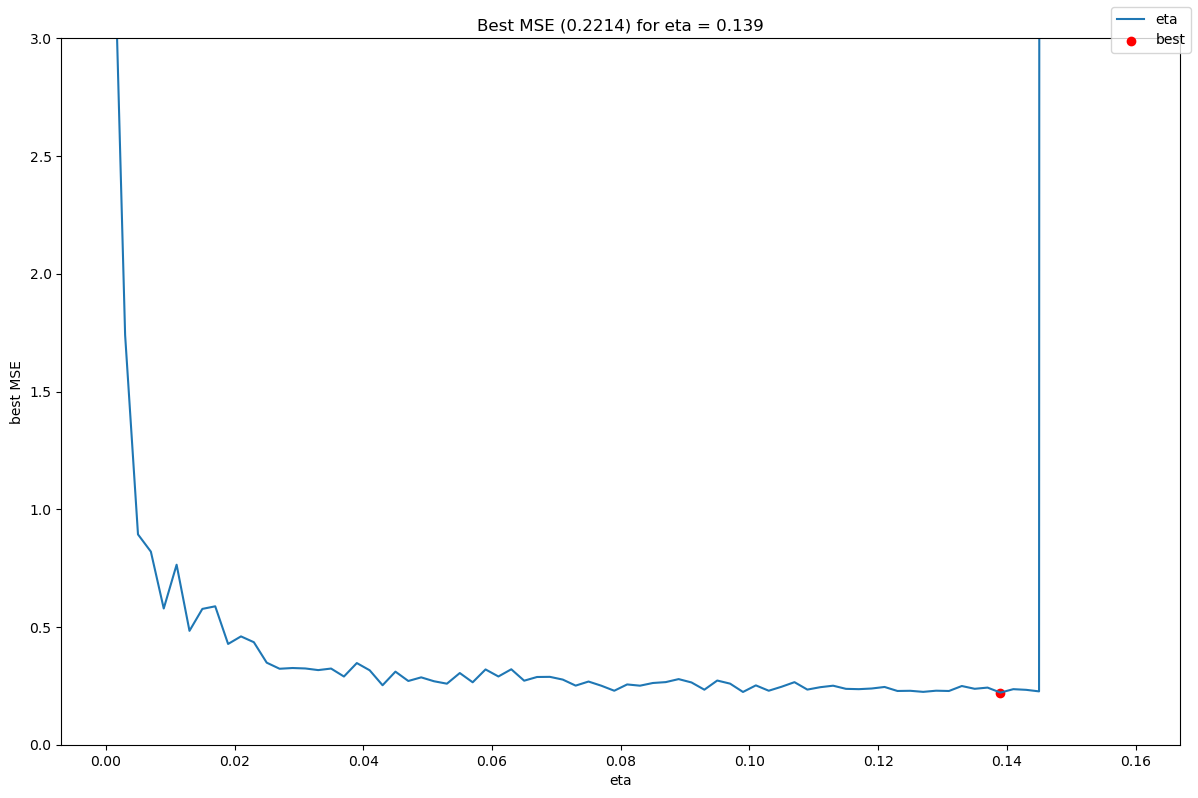

In [831]:
eta_x = [i for (i, _, _) in eta_logs]
eta_y = [i for (_, _, i) in eta_logs]
best_idx = np.argmin(eta_y)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(eta_x, eta_y, label='eta')
ax.scatter(eta_x[best_idx], eta_y[best_idx], marker='o', label='best', color='r')
ax.set_xlabel('eta')
ax.set_ylabel('best MSE')
ax.set_title(f'Best MSE ({eta_y[best_idx]:.4}) for eta = {eta_x[best_idx]}')
ax.set_ylim([0, 3])
fig.legend()
fig.tight_layout()
plt.show()

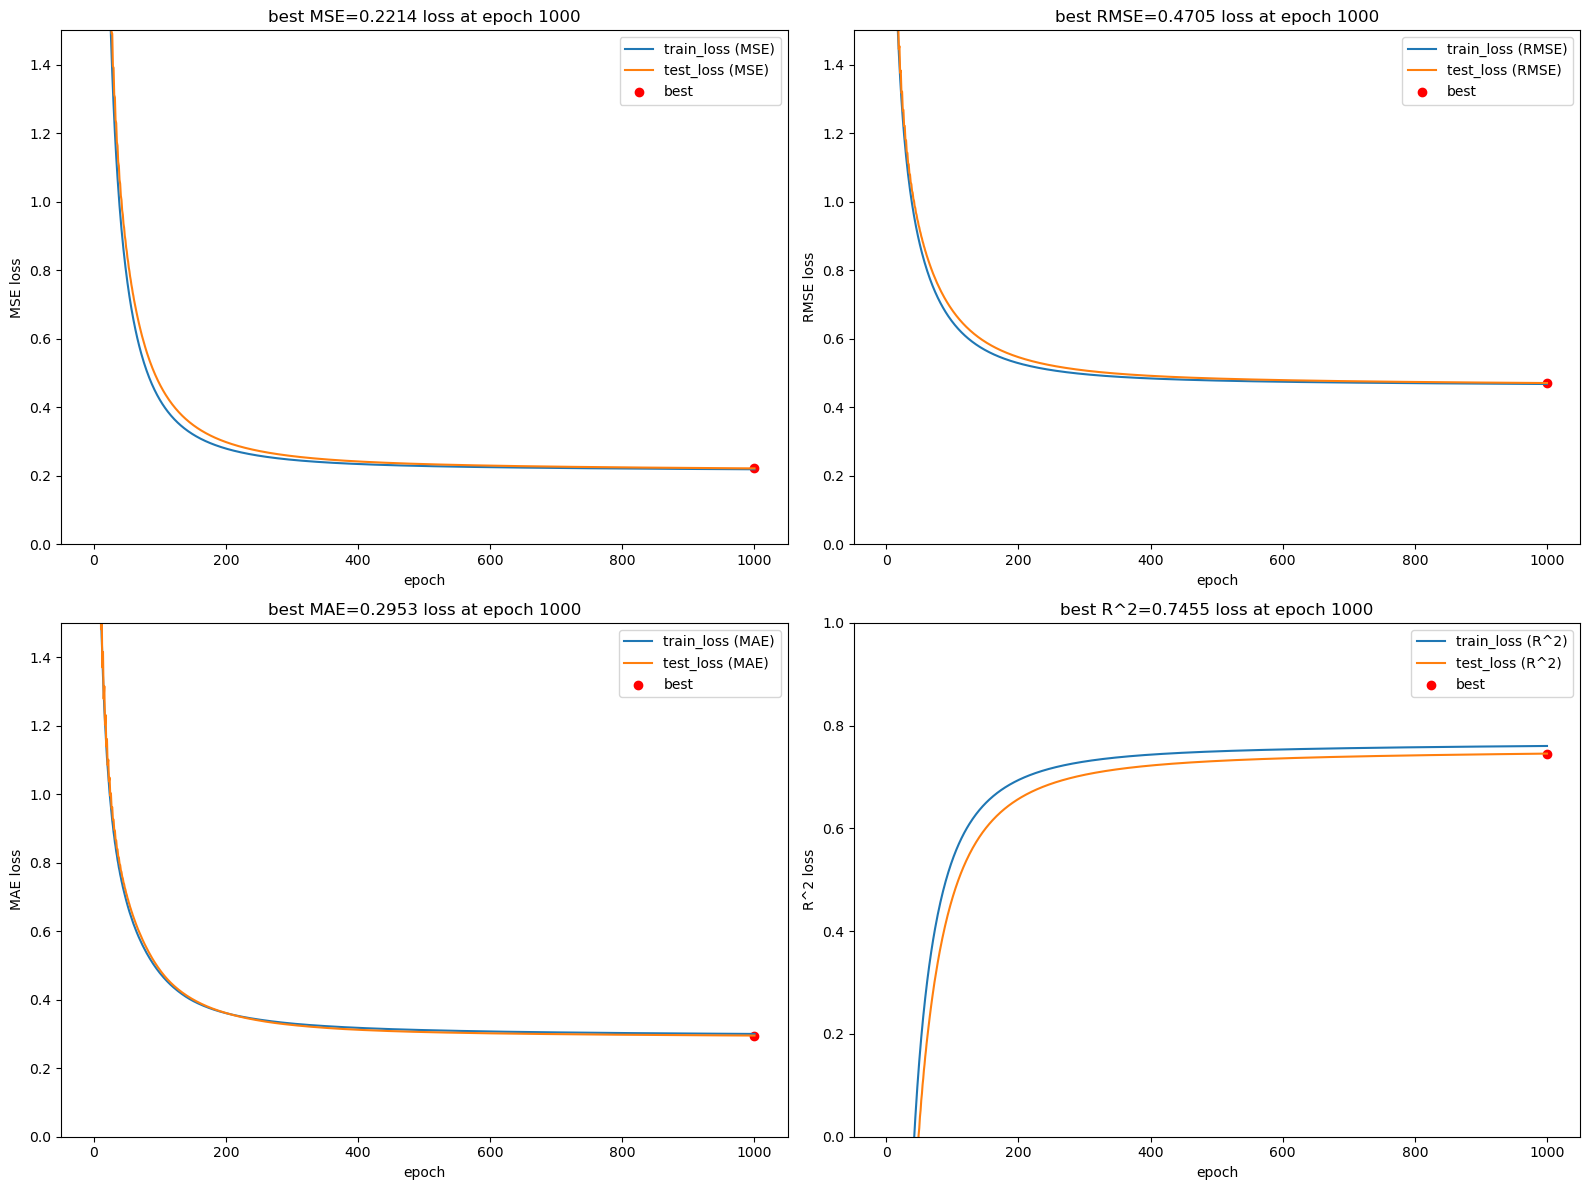

In [832]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

Let's do same for Mini-Batches!

In [835]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for i in range(1, 148, 2):
    eta = 0.001 * i
    print(f'eta: {eta}')
    logs = linear_regression(eta, n_epochs=1000, batch_size=64)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

eta: 0.001
eta: 0.003
eta: 0.005
eta: 0.007
eta: 0.009000000000000001
eta: 0.011
eta: 0.013000000000000001
eta: 0.015
eta: 0.017
eta: 0.019
eta: 0.021
eta: 0.023
eta: 0.025
eta: 0.027
eta: 0.029
eta: 0.031
eta: 0.033
eta: 0.035
eta: 0.037
eta: 0.039
eta: 0.041
eta: 0.043000000000000003
eta: 0.045
eta: 0.047
eta: 0.049
eta: 0.051000000000000004
eta: 0.053
eta: 0.055
eta: 0.057
eta: 0.059000000000000004
eta: 0.061
eta: 0.063
eta: 0.065
eta: 0.067
eta: 0.069
eta: 0.07100000000000001
eta: 0.073
eta: 0.075
eta: 0.077
eta: 0.079
eta: 0.081
eta: 0.083
eta: 0.085
eta: 0.08700000000000001
eta: 0.089
eta: 0.091
eta: 0.093
eta: 0.095
eta: 0.097
eta: 0.099
eta: 0.101
eta: 0.10300000000000001
eta: 0.105
eta: 0.107
eta: 0.109
eta: 0.111
eta: 0.113
eta: 0.115
eta: 0.117
eta: 0.11900000000000001
eta: 0.121
eta: 0.123
eta: 0.125
eta: 0.127
eta: 0.129
eta: 0.131
eta: 0.133
eta: 0.135
eta: 0.137
eta: 0.139
eta: 0.14100000000000001
eta: 0.14300000000000002
eta: 0.145
eta: 0.147


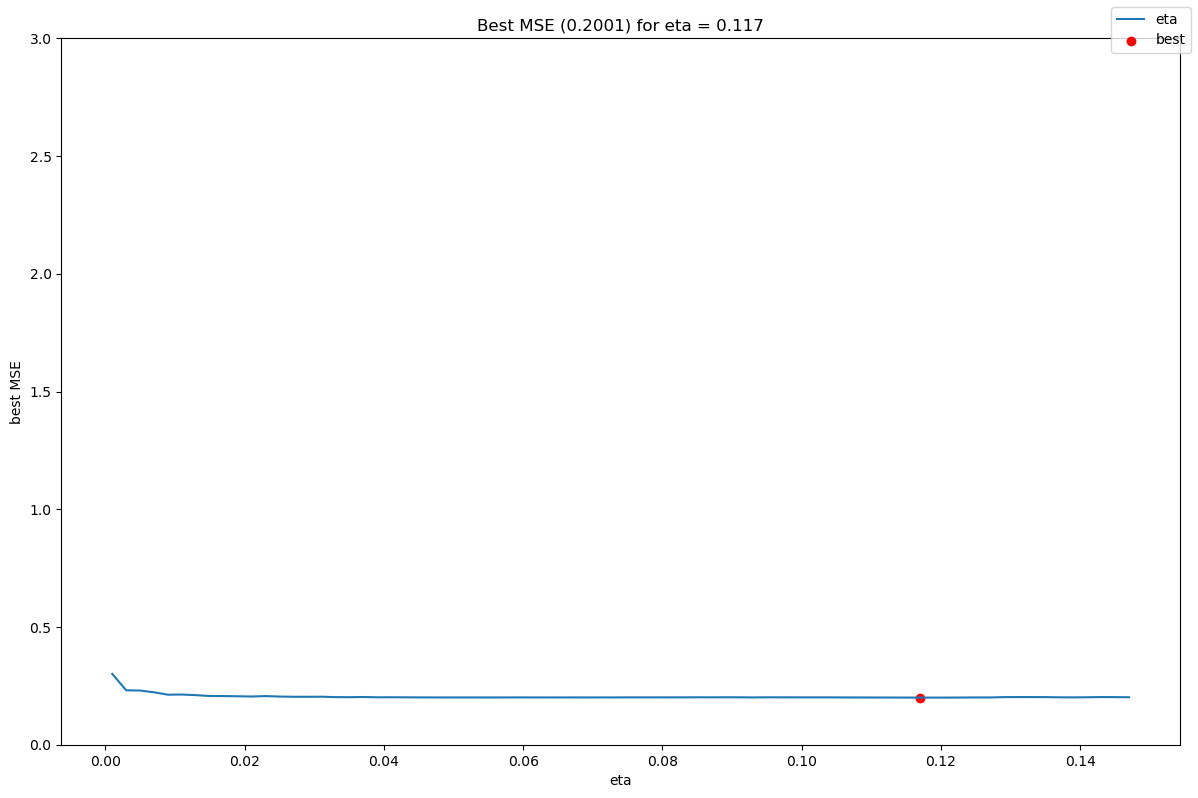

In [836]:
eta_x = [i for (i, _, _) in eta_logs]
eta_y = [i for (_, _, i) in eta_logs]
best_idx = np.argmin(eta_y)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(eta_x, eta_y, label='eta')
ax.scatter(eta_x[best_idx], eta_y[best_idx], marker='o', label='best', color='r')
ax.set_xlabel('eta')
ax.set_ylabel('best MSE')
ax.set_title(f'Best MSE ({eta_y[best_idx]:.4}) for eta = {eta_x[best_idx]}')
ax.set_ylim([0, 3])
fig.legend()
fig.tight_layout()
plt.show()

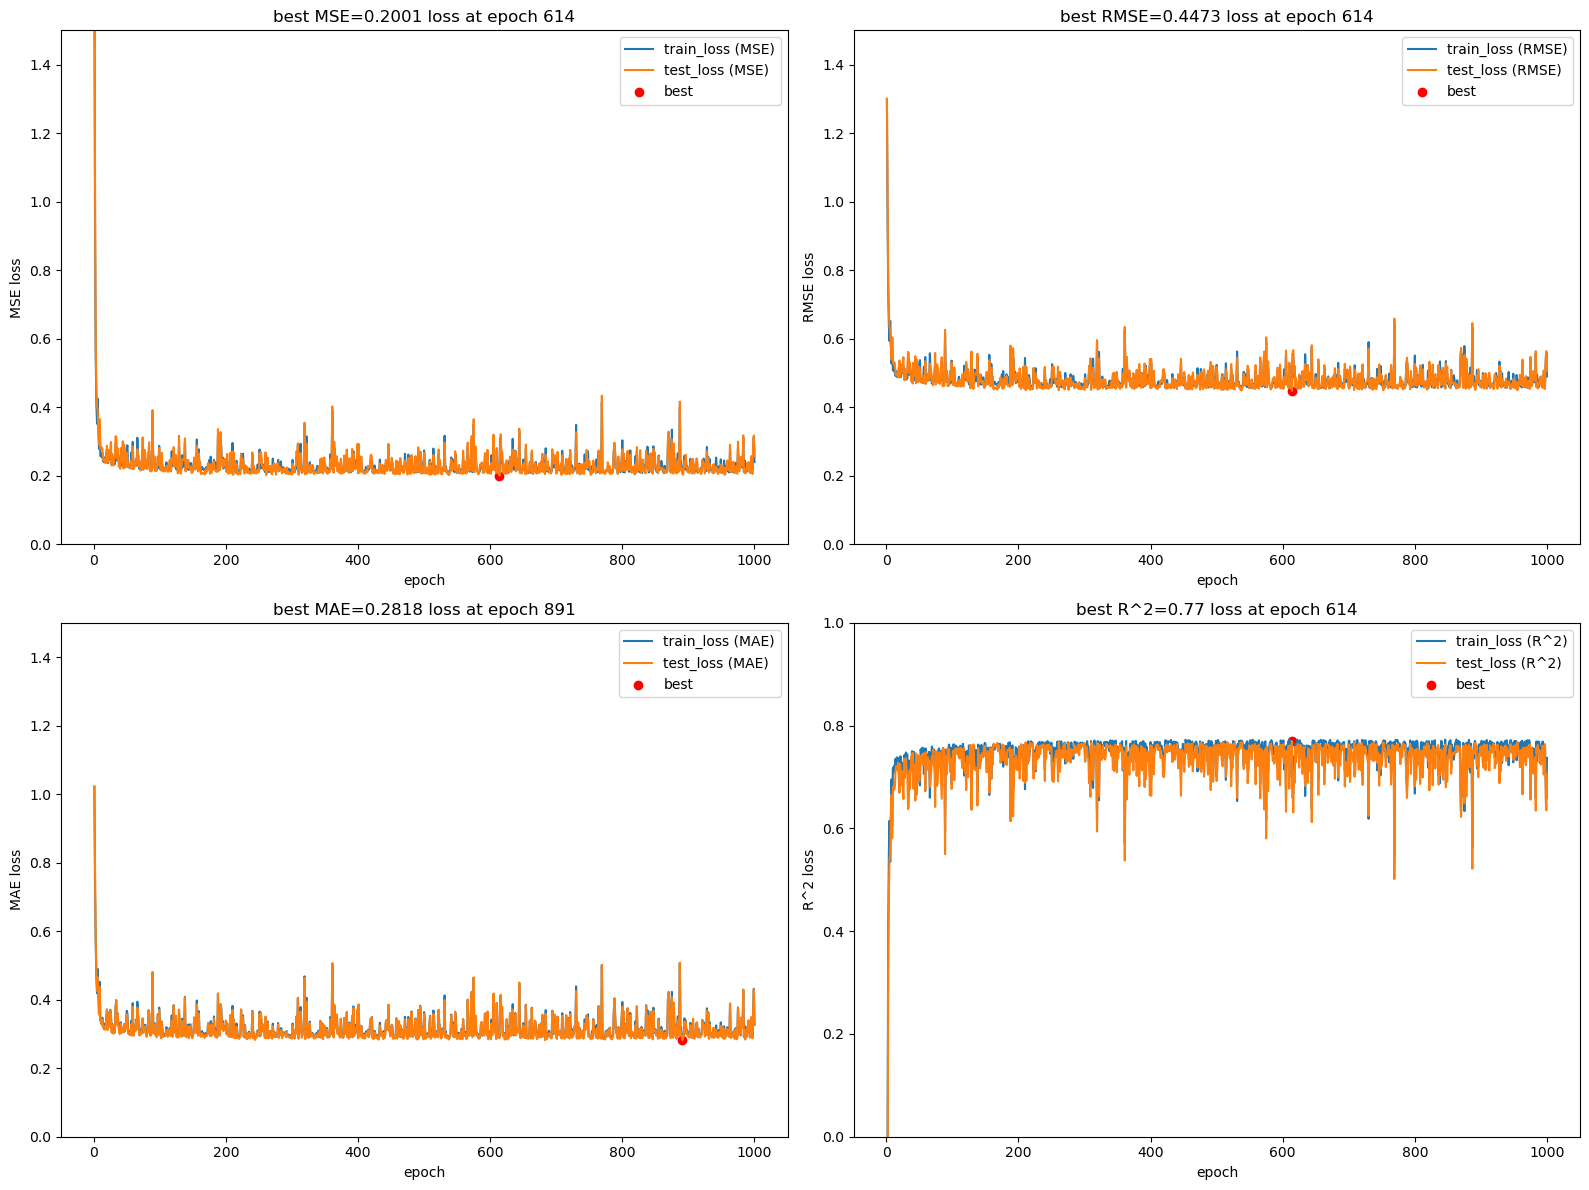

In [837]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()